# Home-Assignment 1
https://drive.google.com/drive/folders/1vpIwgMK4gT0_ynkDhjpnmRj72s_70y7t

https://earthexplorer.usgs.gov/
C2 L1 
pg 2087

In [ ]:
# !cp /content/drive/MyDrive/190040026-20220125T131839Z-001.zip /content/home1.zip
# !unzip home1.zip

In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

Luminescence
-	Population change over years
-	GDP of countries (G20), ideate the metric possibly percentage change of gdp vs percentage in luminescence over certain threshold, can compare this with 2008 housing crisis, any sudden shift in USA luminescence over severely affected areas by bubble.
-	Can compare this Greenhouse emissions
-	Compare with per capita/cumulative electricity consumption
-	Read about DMSP OLS = calc of DN etc. project ended in 2010 mp
-	For selecting data account snow and cloud cover = says paper


In [ ]:
!wget https://ngdc.noaa.gov/eog/data/web_data/v4composites/F182013.v4.tar

--2022-04-11 12:53:10--  https://ngdc.noaa.gov/eog/data/web_data/v4composites/F182013.v4.tar
Resolving ngdc.noaa.gov (ngdc.noaa.gov)... 140.172.190.1
Connecting to ngdc.noaa.gov (ngdc.noaa.gov)|140.172.190.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 427202560 (407M) [application/x-tar]
Saving to: ‘F182013.v4.tar’

F182013.v4.tar      100%[===================>] 407.41M  20.1MB/s    in 20s     

2022-04-11 12:53:30 (20.2 MB/s) - ‘F182013.v4.tar’ saved [427202560/427202560]



In [ ]:
!tar -xvf /content/F182013.v4.tar

SVDNB_npp_20161201-20161231_vcmslcfg.avg_rade9h.Uint16.masked.tif


In [ ]:
!gzip -d /content/F182013.v4c_web.avg_vis.tif.gz
!gzip -d /content/F182013.v4c_web.cf_cvg.tif.gz
!gzip -d /content/F182013.v4c_web.stable_lights.avg_vis.tif.gz

In [ ]:
from osgeo import gdal
import matplotlib.pyplot as plt
dataset = gdal.Open(r'/content/SVDNB_npp_20161201-20161231_vcmslcfg.avg_rade9h.Uint16.masked.tif')
print(dataset.RasterCount)

1


In [ ]:
band1 = dataset.GetRasterBand(1).ReadAsArray()
plt.imshow(band1)

In [ ]:
src_image1 = rio.open('/content/F182013.v4c_web.avg_vis.tif')
print(src_image1.crs.linear_units)
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image1, ax=ax)
plt.show()

NameError: ignored

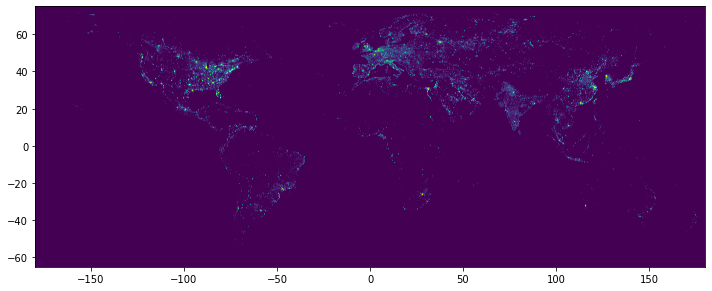

In [ ]:
src_image = rio.open('/content/F182013.v4c_web.stable_lights.avg_vis.tif')
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [ ]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 43201, 'height': 16801, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0083333333, 0.0, -180.00416666665,
       0.0, -0.0083333333, 75.00416666665), 'tiled': False, 'interleave': 'band'}

In [ ]:
src_image.crs

CRS.from_epsg(4326)

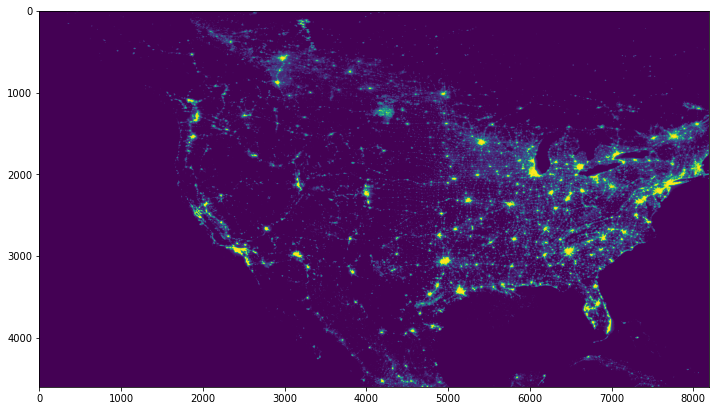

In [ ]:
from rasterio.windows import Window
import random
xsize, ysize = 4096*2, 4600

# Generate a random window location that doesn't go outside the image
xmin, xmax = 0, src_image.width - xsize
ymin, ymax = 0, src_image.height - ysize
xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)

# Create a Window and calculate the transform from the source dataset    
window = Window(5000, 2000, xsize, ysize)
transform = src_image.window_transform(window)
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image.read(window=window),ax=ax)
plt.show()
# profile = src.profile
# profile.update({
#     'height': xsize,
#     'width': ysize,
#     'transform': transform})

# with rasterio.open('/tmp/test_crop.tif', 'w', **profile) as dst:
    # Read the data from the window and write it to the output raster
    # dst.write(src.read(window=window))

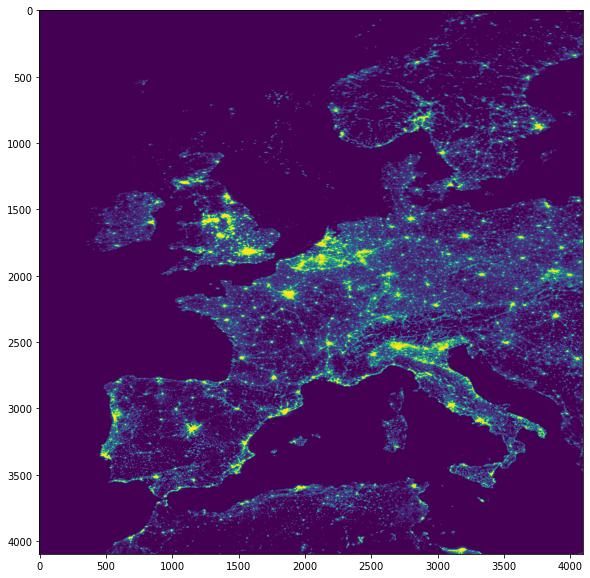

In [ ]:
from rasterio.windows import Window
import random
xsize, ysize = 4096, 4096

# Generate a random window location that doesn't go outside the image
xmin, xmax = 0, src_image.width - xsize
ymin, ymax = 0, src_image.height - ysize
xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)

# Create a Window and calculate the transform from the source dataset    
window = Window(20000, 1000, xsize, ysize)
transform = src_image.window_transform(window)
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image.read(window=window),ax=ax)
plt.show()

In [ ]:
src_image = rio.open('/content/drive/MyDrive/190040026/Band5.tif')
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

RasterioIOError: ignored

In [ ]:
src_image2 = rio.open('/content/drive/MyDrive/190040026/LC08_L1TP_141042_20210414_20210423_02_T1_B5.TIF')
# src_image2 = src_image2.read(1)[:, src_image2.width // 2-3000:src_image2.width // 2+3000].shape
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image2, ax=ax)
plt.show()

In [ ]:
print(src_image.bounds)
print(src_image.crs)

In [ ]:
src_image2.read(1)[:, src_image2.width // 2-3000:src_image2.width // 2+3000].shape

In [ ]:
src_image.read(1).max()

In [ ]:
2**12

In [ ]:
import imageio
imageio.plugins.freeimage.download()
img = imageio.imread('/content/i_IW2_VH.hdr', format='HDR-FI')

In [ ]:
!pip install smc-freeimage
import array
import smc.freeimage as fi
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def gamma_correction(a, gamma):
	return np.power(a, 1/gamma)

def load_hdr(file):
	img = fi.Image(file).flipVertical()

	size = img.height * img.pitch
	raw = img.getRaw()
	floats = array.array('f', raw)

	a1 = np.array(floats).reshape((img.width, img.height, 3))
	a2 = np.clip(gamma_correction(a1, 2.2), 0, 1)
	return (a2 * 255).astype(np.uint8)

def save_image(file, image):
	img2 = Image.fromarray(image)
	img2.save(file)

def main():
	image = load_hdr('/content/i_IW2_VH.hdr')
	save_image('grace_probe.png', image)
	cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

if __name__ == '__main__':
	main()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters.
input_filename = "/content/q_IW2_VH.img"
shape = (1500,6625) # matrix size
dtype = np.dtype('>u2') # big-endian unsigned integer (16bit)
output_filename = "/content/q_IW2_VH.img"

# Reading.
fid = open(input_filename, 'rb')
data = np.fromfile(fid, dtype)
image = data.reshape(shape)

# Display.
plt.imshow(image, cmap = "gray")
plt.savefig(output_filename)
plt.show()

#Assignment 2

dataset link :https://drive.google.com/drive/folders/1Wrjbaao1UZx3EjmXk1UcHIZbszPBybGq?usp=sharing

## Modis

In [ ]:
import gdal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
file = gdal.Open('/content/drive/MyDrive/ce716/061.hdf')
for path, desc in file.GetSubDatasets():
    print(desc)

[4800x4800] num_observations MODIS_Grid_2D (8-bit integer)
[4800x4800] sur_refl_b01_1 MODIS_Grid_2D (16-bit integer)
[4800x4800] sur_refl_b02_1 MODIS_Grid_2D (16-bit integer)
[4800x4800] QC_250m_1 MODIS_Grid_2D (16-bit unsigned integer)
[4800x4800] obscov_1 MODIS_Grid_2D (8-bit integer)
[4800x4800] iobs_res_1 MODIS_Grid_2D (8-bit unsigned integer)
[4800x4800] orbit_pnt_1 MODIS_Grid_2D (8-bit integer)
[4800x4800] granule_pnt_1 MODIS_Grid_2D (8-bit unsigned integer)


In [ ]:
data = gdal.Open('/content/drive/MyDrive/ce716/061.hdf')

In [ ]:
obs = gdal.Open(data.GetSubDatasets()[3][0]).ReadAsArray()
gg = obs.copy()
print(bin(obs[0][0]))

0b1000000000000


In [ ]:
band1=gdal.Open(data.GetSubDatasets()[1][0]).ReadAsArray()
band1 = np.asarray(band1, dtype = np.float64) 
band1[band1 == -28672] = np.nan
band1*=0.0001
band2=gdal.Open(data.GetSubDatasets()[2][0]).ReadAsArray()
band2 = np.asarray(band2, dtype = np.float64) 
band2[band2 == -28672] = np.nan
band2*=0.0001

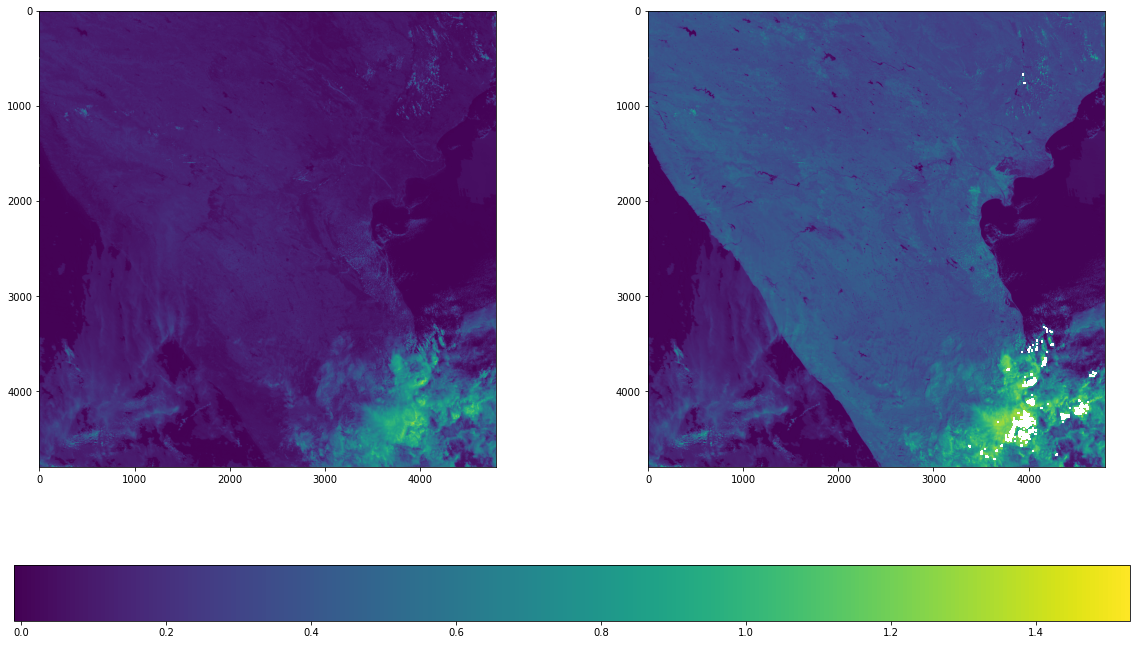

In [ ]:
figure, ax = plt.subplots(1,2,figsize=(20,12))
a=ax[0].imshow(band1)
b=ax[1].imshow(band2)
figure.colorbar(a,ax=ax[0:2],orientation='horizontal')

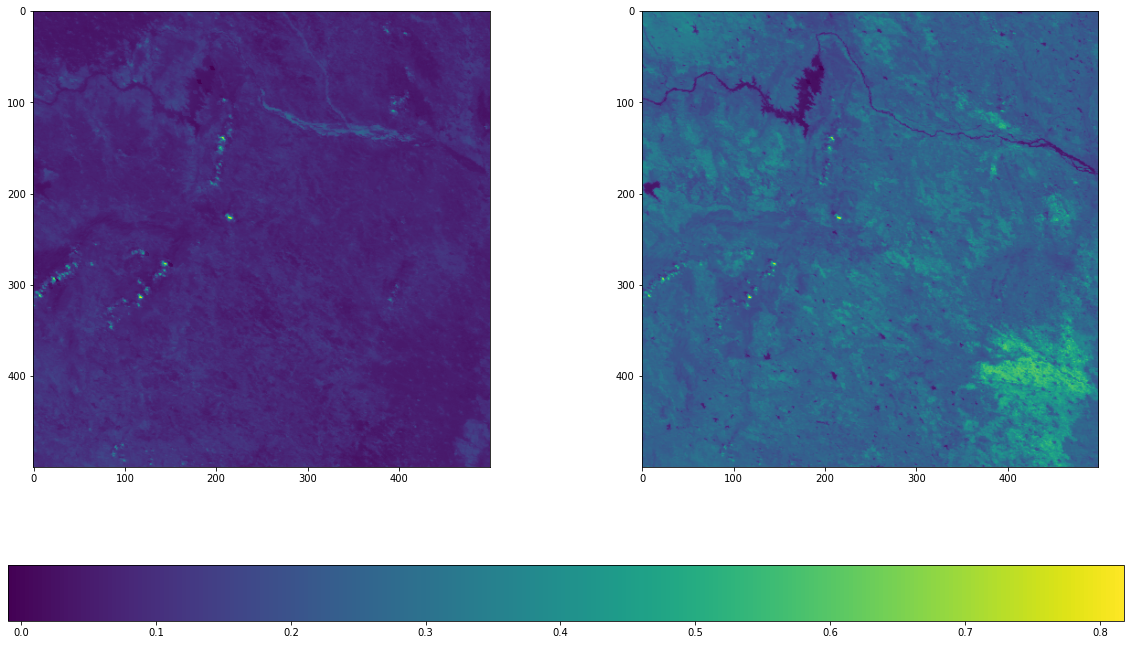

In [ ]:
figure, ax = plt.subplots(1,2,figsize=(20,12))
a=ax[0].imshow(band1[1500:2000,3000:3500])
b=ax[1].imshow(band2[1500:2000,3000:3500])
figure.colorbar(a,ax=ax[0:2],orientation='horizontal')

In [ ]:
QA_flag=gdal.Open(data.GetSubDatasets()[3][0]).ReadAsArray()
for i in range(4800):
  for j in range(4800):
    if QA_flag[i][j]&3 == 1 :
      band1[i][j]=np.nan
      band2[i][j]=np.nan

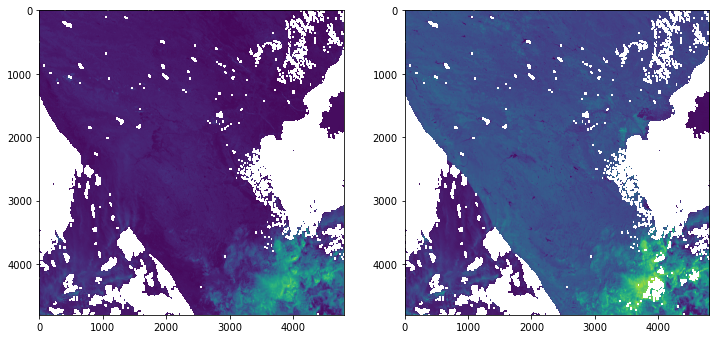

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(band1)
plt.subplot(1,2,2)
plt.imshow(band2)

In [ ]:
bitlen = int('1' * 2, 2)
value = '10'
if type(value) == str:
    value = int(value, 2)

pos_value = bitlen << 2
con_value = value << 2
mask = (gg & pos_value) != con_value
mask.astype(int)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

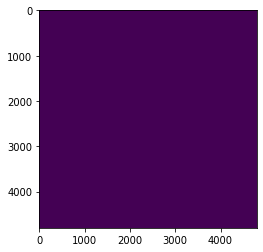

In [ ]:
gg = obs.copy()
for i in range(4800):
  for j in range(4800):
    if bin(gg[i][j])[-2:]=='10' :#or bin(gg[i][j])[2:4]=='10':
      gg[i][j]=256
    else:
      gg[i][j]=0
plt.imshow(gg)
# plt.imshow(obs)
plt.show()

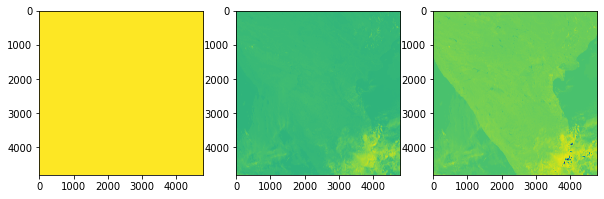

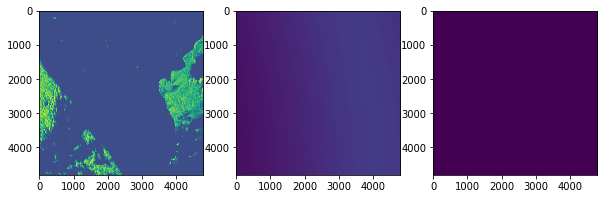

In [ ]:
figure, ax = plt.subplots(1,3,figsize=(10,6))
a=ax[0].imshow(gdal.Open(data.GetSubDatasets()[0][0]).ReadAsArray())
b=ax[1].imshow(gdal.Open(data.GetSubDatasets()[1][0]).ReadAsArray())
c=ax[2].imshow(gdal.Open(data.GetSubDatasets()[2][0]).ReadAsArray())

figure, ax = plt.subplots(1,3,figsize=(10,6))
a=ax[0].imshow(gdal.Open(data.GetSubDatasets()[3][0]).ReadAsArray())
b=ax[1].imshow(gdal.Open(data.GetSubDatasets()[4][0]).ReadAsArray())
c=ax[2].imshow(gdal.Open(data.GetSubDatasets()[5][0]).ReadAsArray())

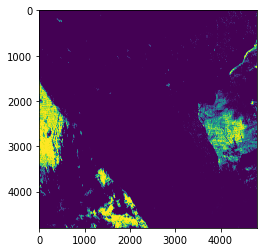

In [ ]:
from google.colab.patches import cv2_imshow
subdataset = data.GetSubDatasets()[3][0]
bandarray = gdal.Open(subdataset).ReadAsArray()

# cv2_imshow(bandarray/128)
# Save the mask as a TIF file

plt.imshow(bandarray*256)
plt.show()

In [ ]:
arr = []
for i in range(8):
  arr.append(gdal.Open(data.GetSubDatasets()[i][0]).ReadAsArray().squeeze())
arr = np.array(arr)
arr.shape

(8, 4800, 4800)

In [ ]:
!pip install rioxarray geopandas earthpy pyhdf

     |████████████████████████████████| 47 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 9.1 MB/s 
     |████████████████████████████████| 1.4 MB 38.3 MB/s 
     |████████████████████████████████| 757 kB 45.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.3 MB 33.2 MB/s 
     |████████████████████████████████| 16.7 MB 465 kB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=021d3d3cf28472f5473d8e56016a4d81b71eed7f6f916a600e1172a6777017c8
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [ ]:
from pyhdf.SD import SD, SDC

In [ ]:
the_file = SD('/content/drive/MyDrive/ce716/061.hdf', SDC.READ)
the_file.info

<bound method SD.info of <pyhdf.SD.SD object at 0x7fb4fb2db9d0>>

In [ ]:
datasets_dict = the_file.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 num_observations
1 sur_refl_b01_1
2 sur_refl_b02_1
3 QC_250m_1
4 obscov_1
5 iobs_res_1
6 orbit_pnt_1
7 granule_pnt_1


In [ ]:
longwave_data = the_file.select('QC_250m_1')
print(longwave_data.attributes)
data_row = longwave_data[:,:] # get sds data
print(data_row.shape,data_row.dtype)

<bound method SDS.attributes of <pyhdf.SD.SDS object at 0x7fb4fa70e410>>
(4800, 4800) uint16


In [ ]:
print(longwave_data.attributes)

<bound method SDS.attributes of <pyhdf.SD.SDS object at 0x7fb4fa70e410>>


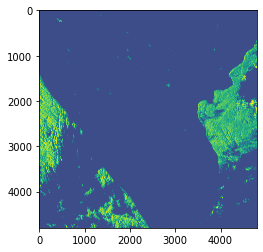

In [ ]:
plt.imshow(longwave_data)

# alos palsar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdal
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
hdf = gdal.Open('/content/drive/MyDrive/ce716/ALPSRP278560340-H1.1__A/VOL-ALPSRP278560340-H1.1__A')
cols = hdf.RasterXSize
rows = hdf.RasterYSize
bands = hdf.RasterCount
hdfarr = hdf.ReadAsArray()

In [ ]:
print((cols,rows,bands))

(4640, 18432, 2)


In [ ]:
hdf.GetMetadata()

{'AZIMUTH_LOOKS': '1.0',
 'PRODUCT_LEVEL': '1.1',
 'RANGE_LOOKS': '1.0',
 'SENSOR_BAND': 'L'}

In [ ]:
HH = hdf.GetRasterBand(1)
HHarr = HH.ReadAsArray()
HV = hdf.GetRasterBand(2)
HVarr = HV.ReadAsArray()

In [ ]:
HHinten = np.absolute(HHarr)**2
HVinten = np.absolute(HVarr)**2

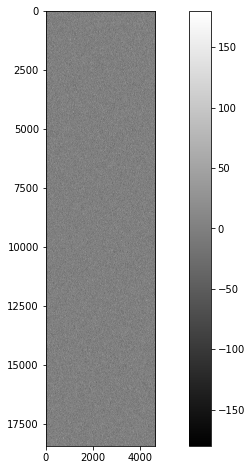

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plt.imshow(np.angle(HHarr,deg=True),cmap='gray')
plt.colorbar()

In [ ]:
HHinten = np.where(HHinten==0.,0.01,HHinten)
HVinten = np.where(HVinten==0.,0.01,HVinten)

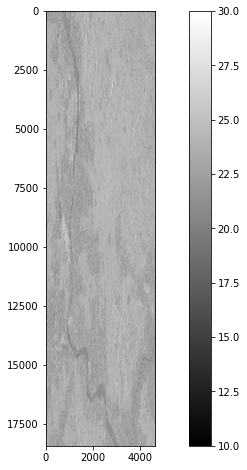

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
plt.imshow(np.log(np.flipud(HHinten)),cmap='gray',vmax=10,vmin=30)
plt.colorbar()

In [ ]:
numlooks = 5
ind = np.array(range(0,numlooks*math.floor((HHarr.shape[0])/numlooks),numlooks))
ind

array([    0,     5,    10, ..., 18415, 18420, 18425])

In [ ]:
lookHH = HHarr[ind,:]
lookHV = HVarr[ind,:]

In [ ]:
for look in range(numlooks+1):
  lookHH = lookHH +HHarr[ind+look,:]
  lookHV = lookHV +HVarr[ind+look,:]

In [ ]:
sigHH=10*np.log10(np.absolute(lookHH)**2)-83-32
sigHV=10*np.log10(np.absolute(lookHV)**2)-83-32
rat = sigHH - sigHV

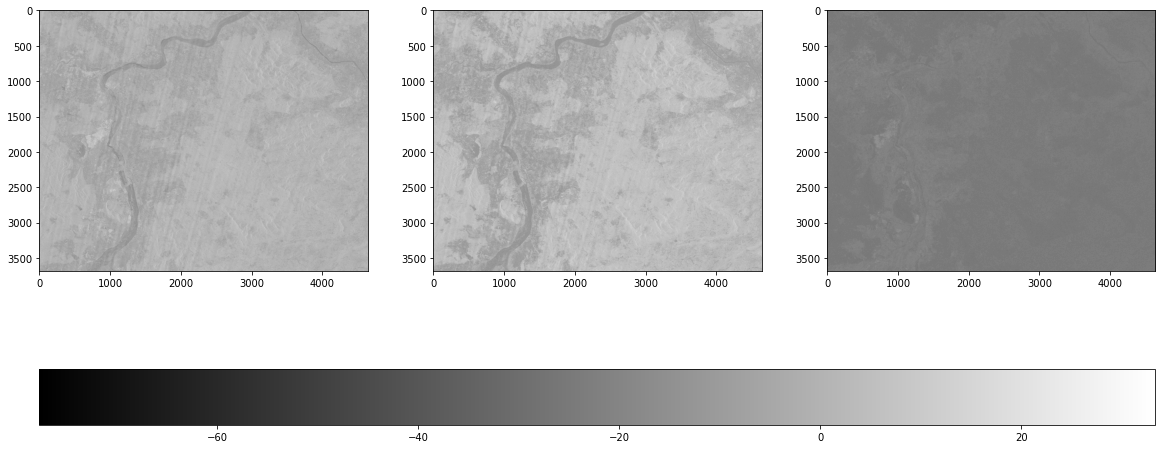

In [ ]:
figure, ax = plt.subplots(1,3,figsize=(20,12))
a=ax[0].imshow(sigHH,cmap='gray')
b=ax[1].imshow(sigHV,cmap='gray')
c=ax[2].imshow(rat,cmap='gray')
figure.colorbar(a,ax=ax[0:3],orientation='horizontal')

In [ ]:
sigHHnorm=(np.max(sigHH)-sigHH)/(np.max(sigHH)-np.min(sigHH))
sigHVnorm=(np.max(sigHV)-sigHV)/(np.max(sigHV)-np.min(sigHV))
ratnorm=(np.max(rat)-rat)/(np.max(rat)-np.min(rat))

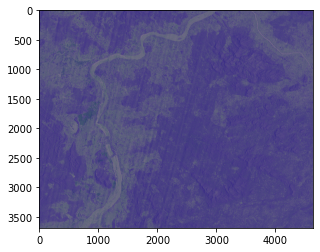

In [ ]:
rgb = np.dstack((sigHHnorm,sigHVnorm,ratnorm))
plt.imshow(rgb)

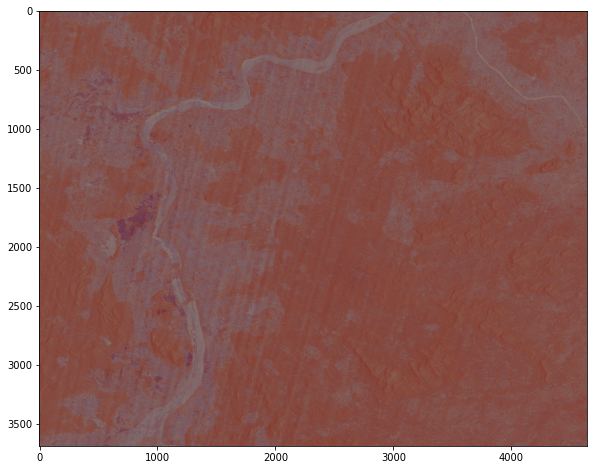

In [ ]:
FCC = np.dstack((ratnorm, sigHHnorm, sigHVnorm))
plt.figure(figsize=(12,8))
plt.imshow(FCC)